Завдання 1: Виведіть перші 5 рядків таблиці.
    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  

Завдання 2: Визначте кількість рядків і стовпчиків за допомогою атрибуту shape.
(32, 5)

Завдання 3: Визначте загальну кільк

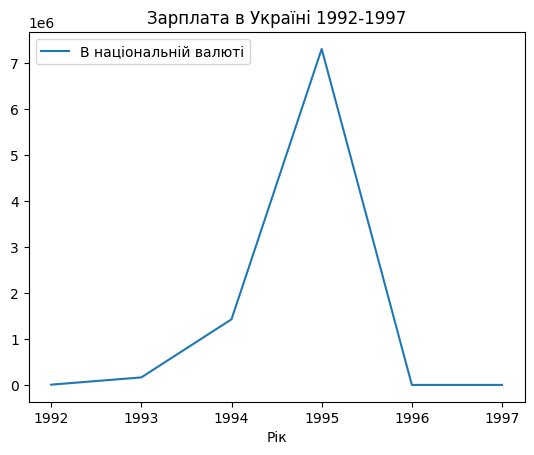


Завдання 15: Видаліть останній рік з таблиці та виведіть оновлену таблицю.
     Рік  В національній валюті  В доларах США
0   1992                5832.88          28.04
1   1993              163533.00          36.03
2   1994             1426343.00          44.99
3   1995             7304000.00          49.53
4   1996                 125.23          68.45
5   1997                 143.09          76.86
6   1998                 152.83          62.39
7   1999                 177.39          42.95
8   2000                 231.04          42.47
9   2001                 311.62          58.01
10  2002                 375.98          70.59
11  2003                 462.58          86.74
12  2004                 590.53         111.02
13  2005                 806.14         157.30
14  2006                1042.88         206.51
15  2007                1352.75         267.87
16  2008                1808.92         343.43
17  2009                1909.25         245.05
18  2010                2246.75

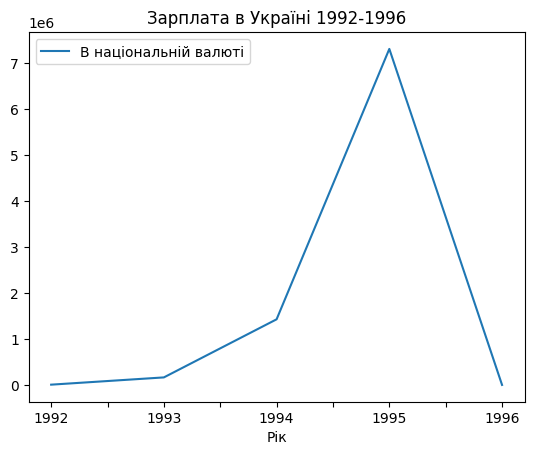


Завдання 17: Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років.
Зарплата за останні два роки більша на 2024.67 грн в порівнянні із середньою зарплатою за останні 5 років.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"
data = pd.read_html(url, header=0)[2]

# 1. Виведіть перші 5 рядків таблиці.
print("Завдання 1: Виведіть перші 5 рядків таблиці.")
print(data.head(5))

# 2. Визначте кількість рядків і стовпчиків за допомогою атрибуту shape.
print("\nЗавдання 2: Визначте кількість рядків і стовпчиків за допомогою атрибуту shape.")
print(data.shape)

# 3. Визначте загальну кількість років та кількість місяців у даних.
print("\nЗавдання 3: Визначте загальну кількість років та кількість місяців у даних.")
print(f"Років: {data.shape[0]}, Місяців: {data.shape[0] * 12}")

# 4. Замінити пропущені значення  «-» в таблиці на NaN.
print("\nЗавдання 4: Замінити пропущені значення  «-» в таблиці на NaN.")
data.replace("-", np.nan, inplace=True)
print(data)

# 5. Визначити тип стовпців за допомогою dtypes.
print("\nЗавдання 5: Визначити тип стовпців за допомогою dtypes.")
print(data.dtypes)

# 6. Видаліть передостанній і останній стовпчики (Кількість кг хліба[20] на середню зарплату,  Кільксть БігМаків на середню зарплату).
print("\nЗавдання 6: Видаліть передостанній і останній стовпчики.")
data.drop(data.columns[-2:], axis=1, inplace=True)
print(data)

# 7. Замінити тип нечислових даних на числові.
print("\nЗавдання 7: Замінити тип нечислових даних на числові.")
for col in data.columns[1:]:
    data[col] = data[col].str.replace(',', '.').str.extract('(\d+.\d+)').astype(float)
print(data.dtypes)

# 8. Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull, sum, len).
print("\nЗавдання 8: Порахуйте частку пропусків в кожній колонці.")
null_percentage = data.isnull().sum() / len(data) * 100
print(null_percentage)

# 9. Замініть всі пропущені значення на середні значення по (стовпцю).
print("\nЗавдання 9: Замініть всі пропущені значення на середні значення по (стовпцю).")
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_cols:
    data[column].fillna(data[column].mean(), inplace=True)
print(data)

# 10. Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.
year_max_salary_uah = data['В національній валюті'].idxmax()
max_salary_uah = data['В національній валюті'].max()
print("\nЗавдання 10: Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.")
print(f"Рік: {data['Рік'][year_max_salary_uah]}, Зарплата в грн: {max_salary_uah}")

# 11. Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату.
year_min_salary_usd = data['В доларах США'].idxmin()
min_salary_usd = data['В доларах США'].min()
print("\nЗавдання 11: Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату.")
print(f"Рік: {data['Рік'][year_min_salary_usd]}, Зарплата в доларах: {min_salary_usd}")

# 12. Виведіть роки, коли зарплата в грн була вище середньої.
avg_salary_uah = data['В національній валюті'].mean()
years_above_avg = data[data['В національній валюті'] > avg_salary_uah]['Рік'].tolist()
print("\nЗавдання 12: Виведіть роки, коли зарплата в грн була вище середньої.")
print(years_above_avg)

# 13. Порівняйте  зарплату  в грн за останні два доступних роки.
last_two_years_salary = data.tail(2)['В національній валюті'].tolist()
print("\nЗавдання 13: Порівняйте  зарплату  в грн за останні два доступних роки.")
print(f"Зарплата за передостанній рік: {last_two_years_salary[0]}, Зарплата за останній рік: {last_two_years_salary[1]}")

# 14. Створіть графік, що відображає  зарплату в Україні з часом (за роками).
print("\nЗавдання 14: Створіть графік, що відображає  зарплату в Україні з часом (за роками).")
data['Рік'] = data['Рік'].str.extract('(\d+)')[0]
filtered_data = data[data['В національній валюті'] != 0]
filtered_data = filtered_data[filtered_data['Рік'].astype(int).between(1992, 1997)]
filtered_data.plot(x='Рік', y='В національній валюті', kind='line', title='Зарплата в Україні 1992-1997')
plt.show()

# 15. Видаліть останній рік з таблиці та виведіть оновлену таблицю.
print("\nЗавдання 15: Видаліть останній рік з таблиці та виведіть оновлену таблицю.")
data = data[:-1]
print(data)

# 16. Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року.
print("\nЗавдання 16: Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року.")
filtered_data_2 = data[data['Рік'].astype(int).between(1992, 1996)]
filtered_data_2.plot(x='Рік', y='В національній валюті', kind='line', title='Зарплата в Україні 1992-1996')
plt.show()

# 17. Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років.
salary_last_two_years = data.tail(2)['В національній валюті'].mean()
salary_last_five_years = data.tail(5)['В національній валюті'].mean()
difference = salary_last_two_years - salary_last_five_years
print("\nЗавдання 17: Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років.")
if difference > 0:
    print(f"Зарплата за останні два роки більша на {difference:.2f} грн в порівнянні із середньою зарплатою за останні 5 років.")
else:
    print(f"Зарплата за останні два роки менша на {abs(difference):.2f} грн в порівнянні із середньою зарплатою за останні 5 років.")
